In [3]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

In [4]:
import matplotlib.pyplot as plt

In [77]:
inputs = ['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6', 'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10', 'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14', 'EXG Channel 15']
outputs = ['nose y', 'nose x', 'left eye y', 'left eye x', 'right eye y', 'right eye x', 'left ear y', 'left ear x', 'right ear y', 'right ear x', 'left shoulder y', 'left shoulder x', 'right shoulder y', 'right shoulder x', 'left elbow y', 'left elbow x', 'right elbow y', 'right elbow x', 'left wrist y', 'left wrist x', 'right wrist y', 'right wrist x', 'left hip y', 'left hip x', 'right hip y', 'right hip x', 'left knee y', 'left knee x', 'right knee y', 'right knee x', 'left ankle y', 'left ankle x', 'right ankle y', 'right ankle x']

In [12]:
#Load the training data into a dataframe
training_dataset = pd.read_csv('../prepared_data/Training_Data_synthetic.csv') 
training_keypoints = training_dataset.copy()
training_labels = np.array(training_keypoints[outputs])
training_eeg = np.array(training_keypoints[inputs])
print(training_eeg.shape)
print(training_labels.shape)

(621, 16)
(621, 34)


In [7]:
training_dataset.head()

,nose y,nose x,nose c,left eye y,left eye x,left eye c,right eye y,right eye x,right eye c,left ear y,...,EXG Channel 6,EXG Channel 7,EXG Channel 8,EXG Channel 9,EXG Channel 10,EXG Channel 11,EXG Channel 12,EXG Channel 13,EXG Channel 14,EXG Channel 15
0,0.184159,0.509971,0.011455,0.148159,0.567829,0.009986,0.164116,0.548859,0.017831,0.102838,...,41.996988,-132.858158,77.864949,-14.744279,-57.041168,-53.770537,-37.420275,-51.738719,33.124594,-74.722500
1,0.184159,0.509971,0.011455,0.148159,0.567829,0.009986,0.164116,0.548859,0.017831,0.102838,...,-28.828246,-64.418623,64.753902,-18.535593,-60.881877,-87.289420,-24.009047,-91.002046,29.745448,-33.248701
2,0.184159,0.509971,0.011455,0.148159,0.567829,0.009986,0.164116,0.548859,0.017831,0.102838,...,-98.293650,33.916804,-16.672206,-26.084640,-74.956990,-82.361904,-24.567369,-111.580291,-9.961168,16.216094
3,0.200854,0.510157,0.011543,0.163591,0.566250,0.010709,0.188705,0.485532,0.011435,0.102403,...,-55.649411,-53.832882,10.879658,17.166846,155.629848,-31.591964,23.240537,-85.198344,4.839110,79.509034
4,0.200854,0.510157,0.011543,0.163591,0.566250,0.010709,0.188705,0.485532,0.011435,0.102403,...,20.206357,-54.276958,-15.435135,36.097077,106.523375,-30.153652,-20.745524,-29.518766,-13.001953,98.014149


In [22]:
#Same thing for the validation data
# validation_dataset = pd.read_csv('../prepared_data/Validation_Data_synthetic.csv')
# validation_keypoints = validation_dataset.copy()
# validation_labels = np.array(validation_keypoints[outputs])
# validation_eeg = np.array(validation_keypoints[inputs])
# print(validation_eeg.shape)
# print(validation_labels.shape)

In [23]:
# validation_dataset.head()

In [17]:
seq_length = 32

def overlap_samples(seq_length, feats, labels):
    new_l = labels[seq_length - 1:]
    feat_list = [feats[i:i + seq_length] for i in range(feats.shape[0] - seq_length + 1)]
    new_f = np.array(feat_list)
    return new_f, new_l

training_eeg, training_labels = overlap_samples(seq_length, training_eeg, training_labels)
print(training_eeg.shape)
print(training_labels.shape)

(590, 32, 16)
(590, 34)


In [15]:
#Set the model
pose_model = tf.keras.Sequential([
    layers.LSTM(256, return_sequences=True, input_shape=(seq_length, 16)),
    layers.Dropout(.5),
    layers.LSTM(256, return_sequences=True),
    layers.Dropout(.5),
    layers.LSTM(128),
    layers.BatchNormalization(),
    layers.Dense(512, input_dim=128),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(.5),
    layers.Dense(512, input_dim=512),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(.5),
    layers.Dense(256, input_dim=512),
    layers.Activation('relu'),
    layers.Dropout(.3),
    layers.Dense(34, input_dim=64),
    ])



In [19]:
pose_model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [20]:
pose_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32, 256)           279552    
                                                                 
 dropout_2 (Dropout)         (None, 32, 256)           0         
                                                                 
 lstm_4 (LSTM)               (None, 32, 256)           525312    
                                                                 
 dropout_3 (Dropout)         (None, 32, 256)           0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               197120    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                        

In [21]:
#Train the model
history = pose_model.fit(training_eeg, training_labels, epochs=100, validation_split=.2)

Epoch 1/100
15/15 [==============================] - 11s 294ms/step - loss: 2.5495 - accuracy: 0.0403 - val_loss: 0.2508 - val_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 2s 150ms/step - loss: 1.9034 - accuracy: 0.0593 - val_loss: 0.2228 - val_accuracy: 0.0254
Epoch 3/100
15/15 [==============================] - 2s 153ms/step - loss: 1.4710 - accuracy: 0.0847 - val_loss: 0.1984 - val_accuracy: 0.0678
Epoch 4/100
15/15 [==============================] - 2s 154ms/step - loss: 1.1902 - accuracy: 0.0699 - val_loss: 0.1721 - val_accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 2s 153ms/step - loss: 0.9606 - accuracy: 0.0953 - val_loss: 0.1544 - val_accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 2s 153ms/step - loss: 0.7808 - accuracy: 0.0847 - val_loss: 0.1479 - val_accuracy: 0.2458
Epoch 7/100
15/15 [==============================] - 2s 154ms/step - loss: 0.6535 - accuracy: 0.1165 - val_loss: 0.1475 - val_acc

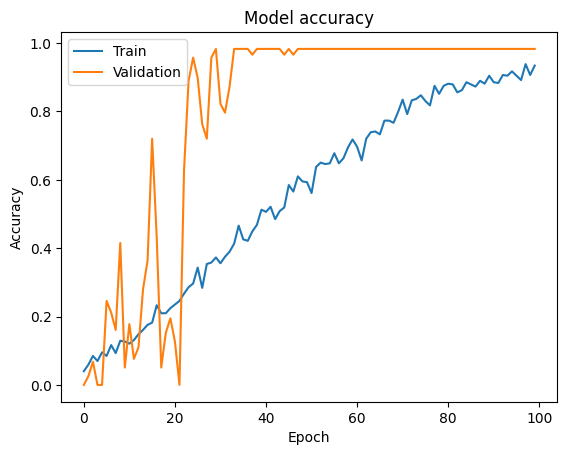

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

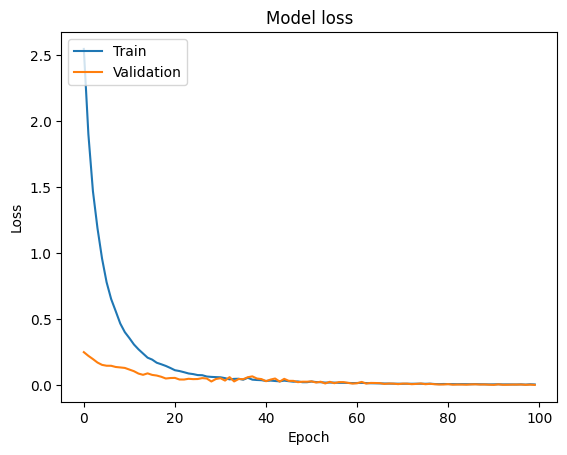

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [46]:
#Load test data
test_dataset = pd.read_csv('../prepared_data/Test_Data_synthetic.csv')
test_keypoints = test_dataset.copy()
test_labels = np.array(test_keypoints[outputs])
test_eeg = np.array(test_keypoints[inputs])
test_dataset.shape

(208, 67)

In [48]:
test_eeg, test_labels = overlap_samples(seq_length, test_eeg, test_labels)
print(test_eeg.shape)
print(test_labels.shape)

(177, 32, 16)
(177, 34)


In [49]:
#Test the model with the test data
results = pose_model.evaluate(test_eeg, test_labels)
print('test loss & acc:', results)

6/6 [==============================] - 0s 53ms/step - loss: 0.0023 - accuracy: 0.9548
test loss & acc: [0.002269880147650838, 0.9548022747039795]


In [50]:
preds = pose_model.predict(test_eeg)
preds.shape

6/6 [==============================] - 0s 52ms/step


(177, 34)

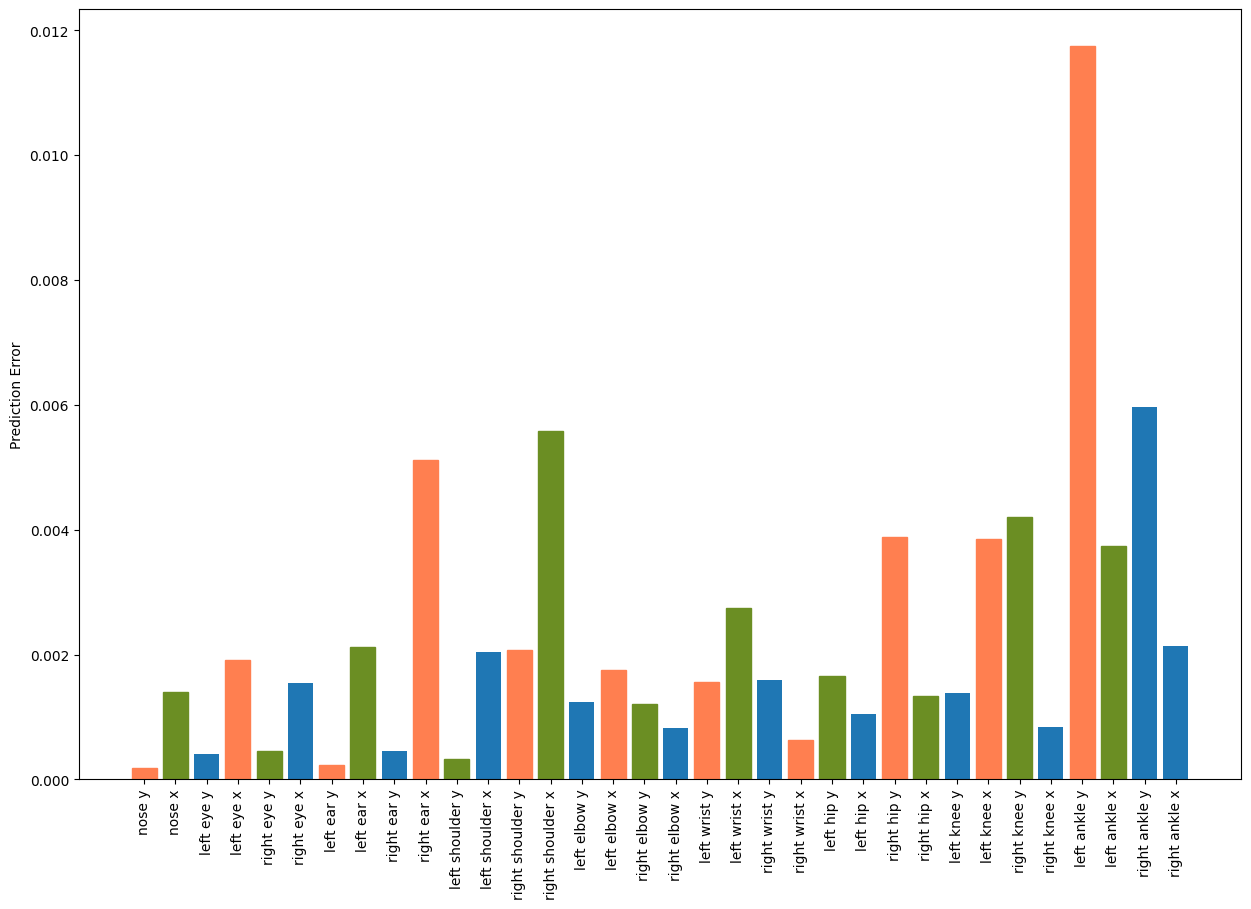

In [86]:
error = test_labels - preds
sq_error = error * error
avg_error = np.mean(sq_error, axis=0)
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.ylabel('Prediction Error')
# print(test_keypoints[outputs].columns[:])
bar = plt.bar(test_keypoints[outputs].columns[:], avg_error)
for i in range(0,33,3):
    bar[i].set_color('coral')
    bar[i+1].set_color('olivedrab')
plt.show()